Text(0, 0.5, 'Log(L/L$_\\odot$)')

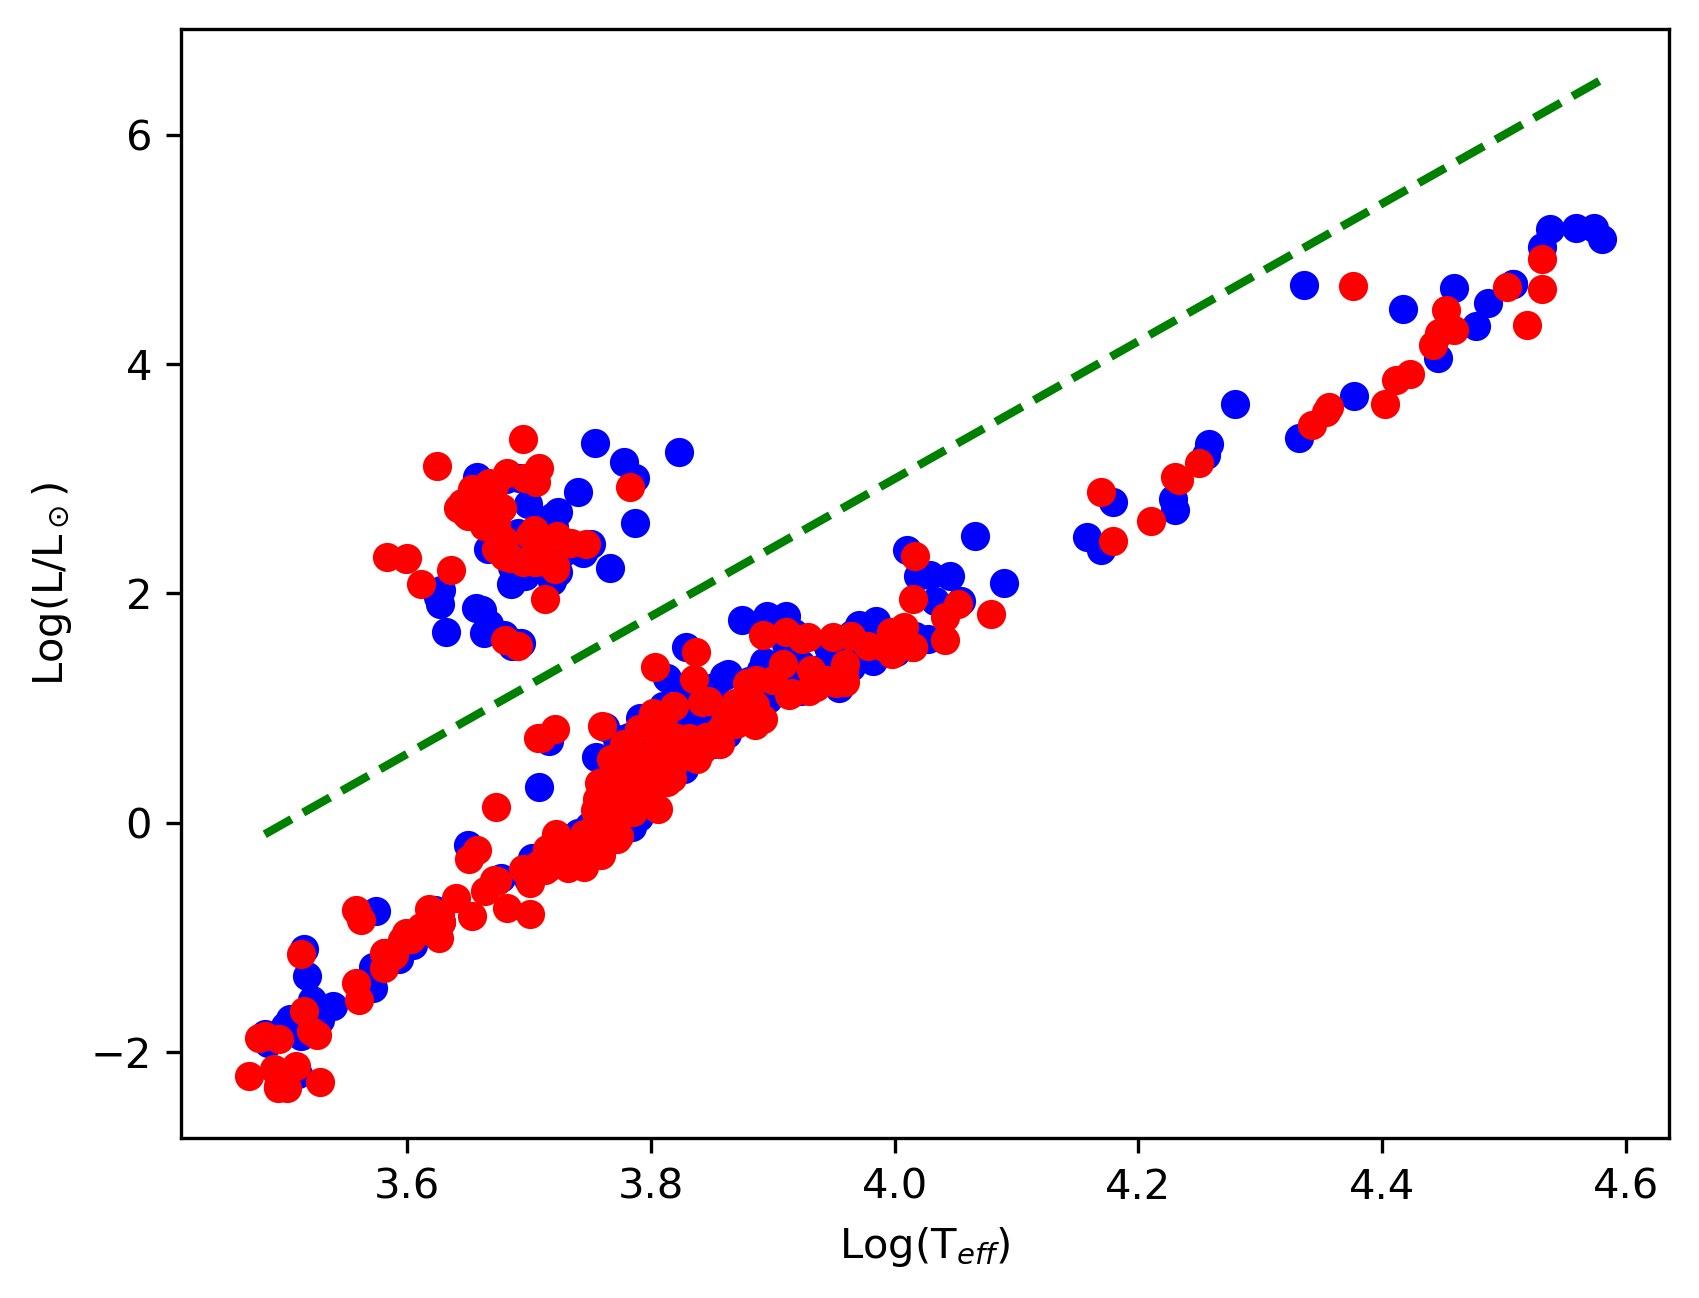

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table
import scipy
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300
import arviz as az

df = Table.read('https://www.astro.keele.ac.uk/jkt/debcat/debs.dat', format='ascii').to_pandas()

#filter out erroneous values
df = df[df['logL1'] > -3]

logT1 = df["logT1"]
logT1 = np.array(logT1)
logL1 = df["logL1"]
logL1 = np.array(logL1)

logT2 = df["logT2"]
logT2 = np.array(logT2)
logL2 = df["logL2"]
logL2 = np.array(logL2)

plt.scatter(logT1, logL1, color='blue')
plt.scatter(logT2, logL2, color='red')
plt.plot(logT1, 6*logT1 -21, color='green', linestyle='--', linewidth=2)
plt.xlabel('Log(T$_{eff}$)')
plt.ylabel('Log(L/L$_\odot$)')

In [45]:
#make the cut for red giant and main sequence for dataset 1
logR1_ms = df['logR1'][logL1 < (6*logT1-21)]
logR1_rg = df['logR1'][logL1 > (6*logT1-21)]

#make the cut for red giant and main sequence for dataset 2
logR2_ms = df['logR2'][logL1 < (6*logT1-21)]
logR2_rg = df['logR2'][logL1 > (6*logT1-21)]

#filter the errors for dataset 1
logR1_ms_err = df['logR1e'][logL1 < (6*logT1-21)]
logR1_rg_err = df['logR1e'][logL1 > (6*logT1-21)]

#filter the erros for dataset 2
logR2_ms_err = df['logR2e'][logL1 < (6*logT1-21)]
logR2_rg_err = df['logR2e'][logL1 > (6*logT1-21)]

#convert all data to numpy arrays
logR1_ms = np.array(logR1_ms)
logR1_rg = np.array(logR1_rg)
logR2_ms = np.array(logR2_ms)
logR2_rg = np.array(logR2_rg)

#convert all errors to numpy arrays
logR1_ms_err = np.array(logR1_ms_err)
logR1_rg_err = np.array(logR1_rg_err)
logR2_ms_err = np.array(logR2_ms_err)
logR2_rg_err = np.array(logR2_rg_err)

#concatenate all radii data into one array
radii_all = np.concatenate((logR1_ms, logR1_rg, logR2_ms, logR2_rg))

#concatenate all radius error data into one array
radii_all_err = np.concatenate((logR1_ms_err, logR1_rg_err, logR2_ms_err, logR2_rg_err))

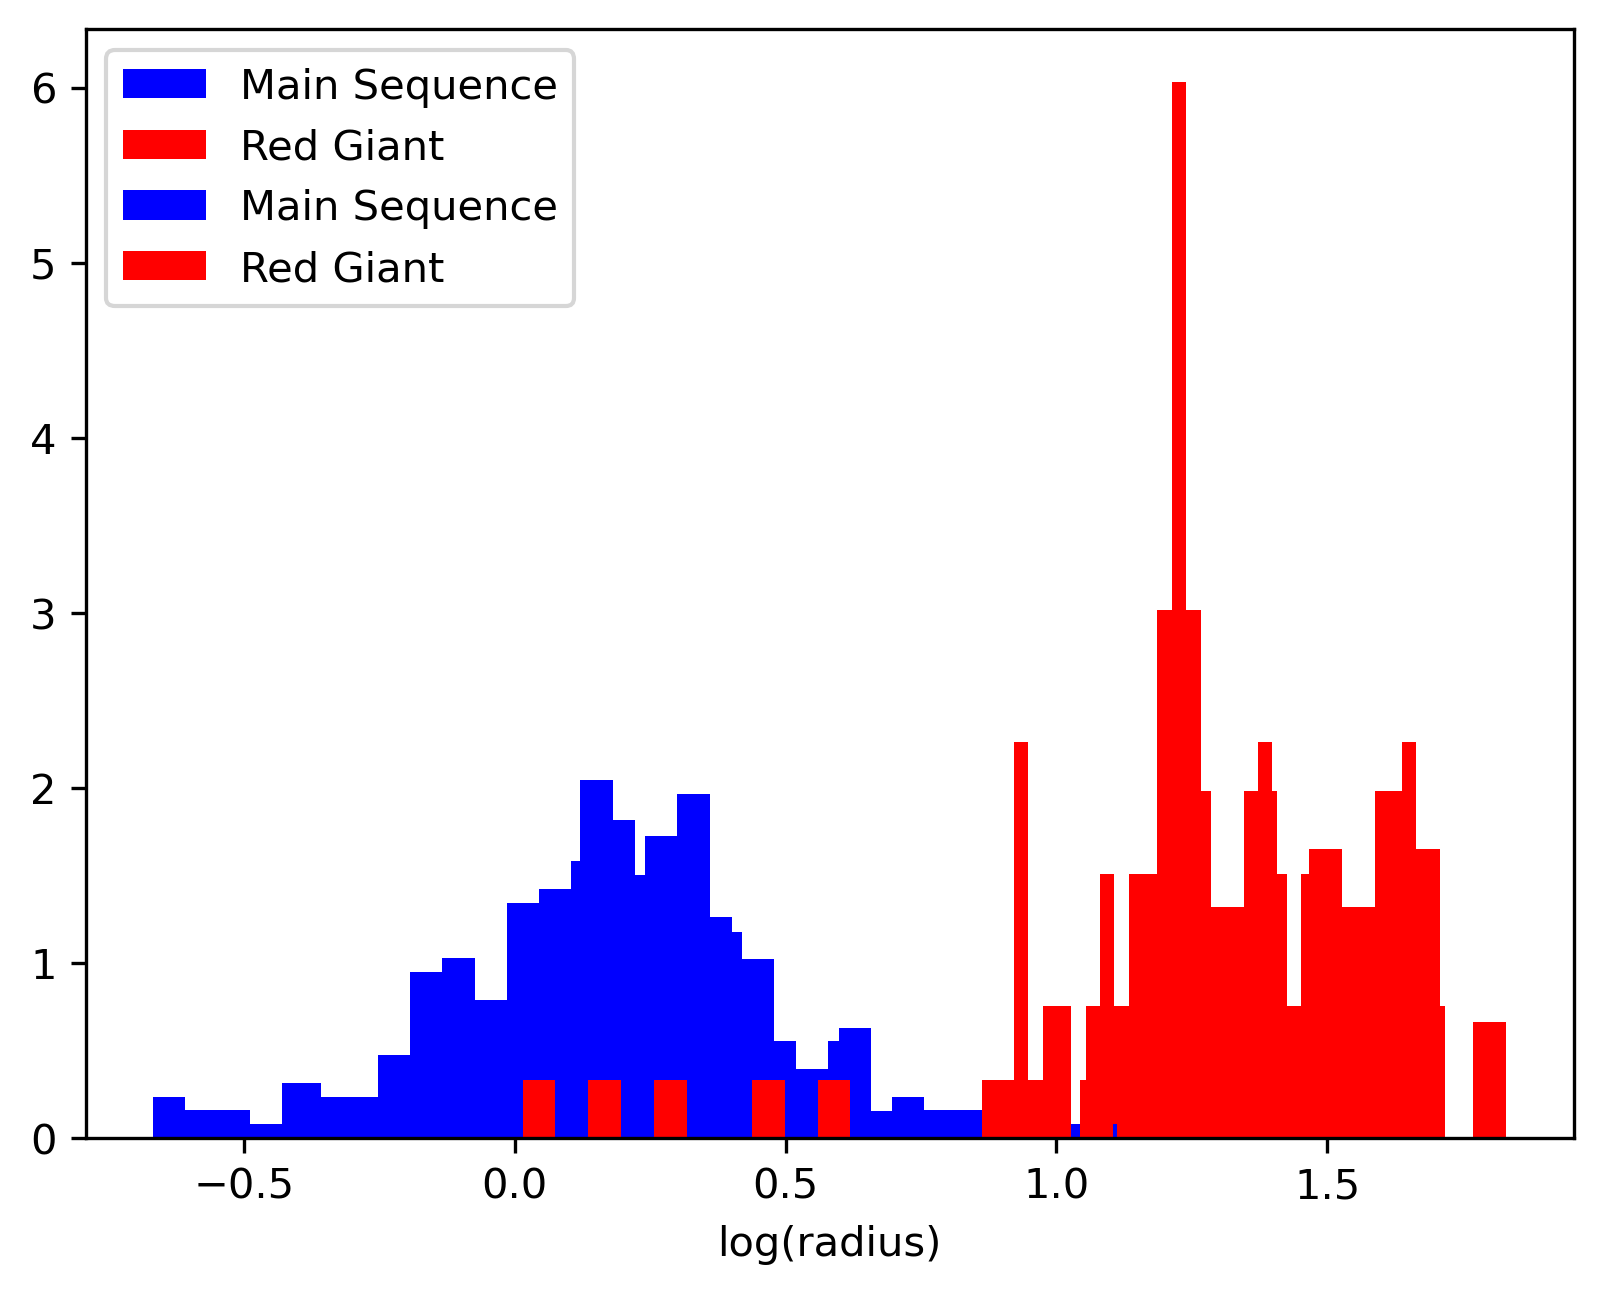

In [54]:
plt.hist(logR1_ms, color='blue', density=True, label='Main Sequence', bins=30)
plt.hist(logR1_rg, color='red', density=True, label='Red Giant', bins=30)
plt.hist(logR2_ms, color='blue', density=True, label='Main Sequence', bins=30)
plt.hist(logR2_rg, color='red', density=True, label='Red Giant', bins=30)
plt.xlabel('log(radius)')
plt.legend()

Text(0.5, 0, 'log(radius)')

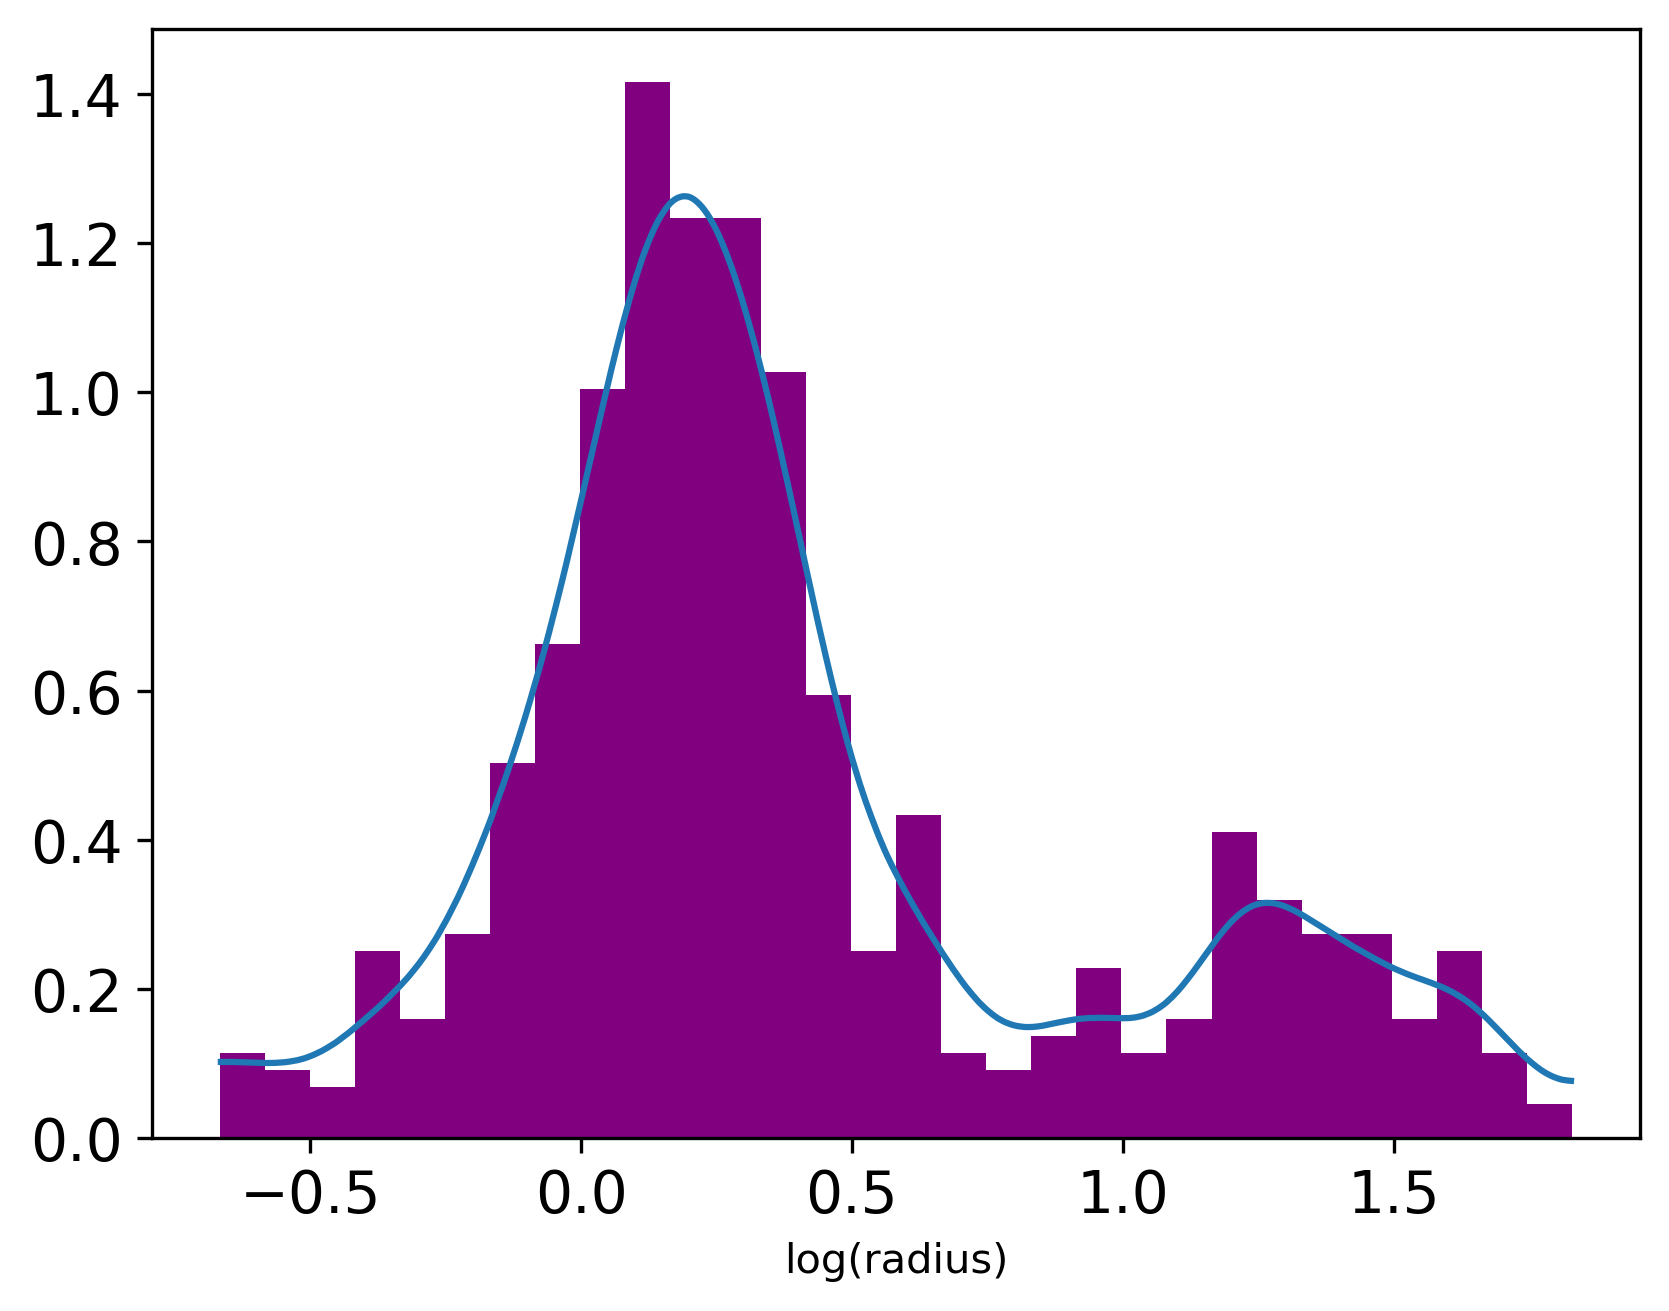

In [49]:
plt.hist(radii_all, color='purple', density=True, bins=30)
az.plot_kde(radii_all)
plt.xlabel('log(radius)')